In [1]:
import numpy as np
import math
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt 
import re
import os

In [16]:
model = "small"
integrator = "ros3"
relTol = "1e-2"

In [17]:
if (model == "cbm4"):
    species_names = ("O1D","H2O2","PAN","CRO","TOL","N2O5","XYL","XO2N","HONO","PNA","TO2","HNO3","ROR","CRES","MGLY","CO","ETH","XO2","OPEN","PAR","HCHO","ISOP","OLE","ALD2","O3","NO2","OH","HO2","O","NO3","NO","C2O3")
elif (model == "small"):
    species_names = ("O1D","O","O3","NO","NO2")
elif (model == "chapman"):
      species_names = ("O","O3","NO","NO2","O2")
elif (model == "saprc"):
    species_names = ("H2SO4","HCOOH","CCO_OH","RCO_OH","CCO_OOH","RCO_OOH","XN","XC","SO2","O1D","ALK1","BACL","PAN","PAN2","PBZN","MA_PAN","H2O2","N2O5","HONO","ALK2","ALK3","TBU_O","ALK5","ARO2","HNO4","COOH","HOCOO","BZNO2_O","MEOH","ALK4","ARO1","DCB2","DCB3","CRES","DCB1","NPHE","ROOH","BALD","PHEN","CO","MGLY","ACET","HNO3","ETHENE","GLY","BZ_O","ISOPRENE","R2O2","TERP","METHACRO","OLE1","ISOPROD","OLE2","MVK","CCHO","HCHO","RNO3","O3P","RCHO","MEK","PROD2","O3","HO2","RO2_N","MA_RCO3","C_O2","BZCO_O2","RO2_R","NO","NO2","NO3","CCO_O2","RCO_O2","OH")
elif (model == "smog"):
    species_names = ("HNO3","O","RH","RCOO2NO2","O3","HO2","RCOO2","RCHO","RO2","NO","NO2","OH")
elif (model == "strato"):
    species_names = ("CH3","Cl2","Cl2O2","ClOO","OClO","BrCl","HOBr","BrONO2","HCO","CH3O","O1D","N2O5","HBr","CH3OOH","HNO4","HCl","H2O2","HOCl","HNO3","H","CH3O2","ClONO2","NO3","CH2O","Br","OH","Cl","ClO","O3","NO","BrO","O","HO2","NO2")
elif (model == "tropo"):
    species_names = ("SO4","ACTA","R3N2","SUCA","GLUA","ADIA","PRN2","PRPN", "OZID","MSA","DOL6","DOL7","DOL8","CPET","CHEX","MACA","PYVA","DMS","C2H6","C3H8","MPAN","IPAN","H2O2","AROM","TPAN","N2O5","HONO","RAN2","CH4","ALKA","HNO4","PAN","ACO2","DIAL","GLYX","CRES","AHO2","RAN1","ZO2","ETHE","CO","MGLY","MAN2","TO2","HAC","R3O2","EO2","PO2","MRO2","MVN2","ETO2","PRN1","RIO2","TCO3","INO2","HACO","HNO3","MGGY","VRO2","ALKE","RAO2","KET","KO2","ISOP","MO2","MAO3","CRO2","MCRG","MVKO","MAOO","ROOH","MCO3","MACR","O3","MVK","NO2","HCHO","SO2","ALD2","CHO2","NO","HO2","NO3","OH")
    
species = len(species_names)

In [19]:
total_error_double = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model, model)),usecols= 1)
total_error_single = np.loadtxt(("%s/%s_sp/%s_sp_E.dat" % (os.getcwd(),model, model)),usecols= 1)
total_error_mixed = np.loadtxt(("%s/%s_mp/%s_mp_E.dat" % (os.getcwd(),model, model)),usecols= 1)

sun = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model, model)),usecols= 2)

t2_error_double = np.loadtxt(("%s/%s_dp/%s_dp_E.dat" % (os.getcwd(),model,model)),usecols=0)
t2_error_single = np.loadtxt(("%s/%s_sp/%s_sp_E.dat" % (os.getcwd(),model,model)),usecols=0)
t2_error_mixed = np.loadtxt(("%s/%s_mp/%s_mp_E.dat" % (os.getcwd(),model,model)),usecols=0)


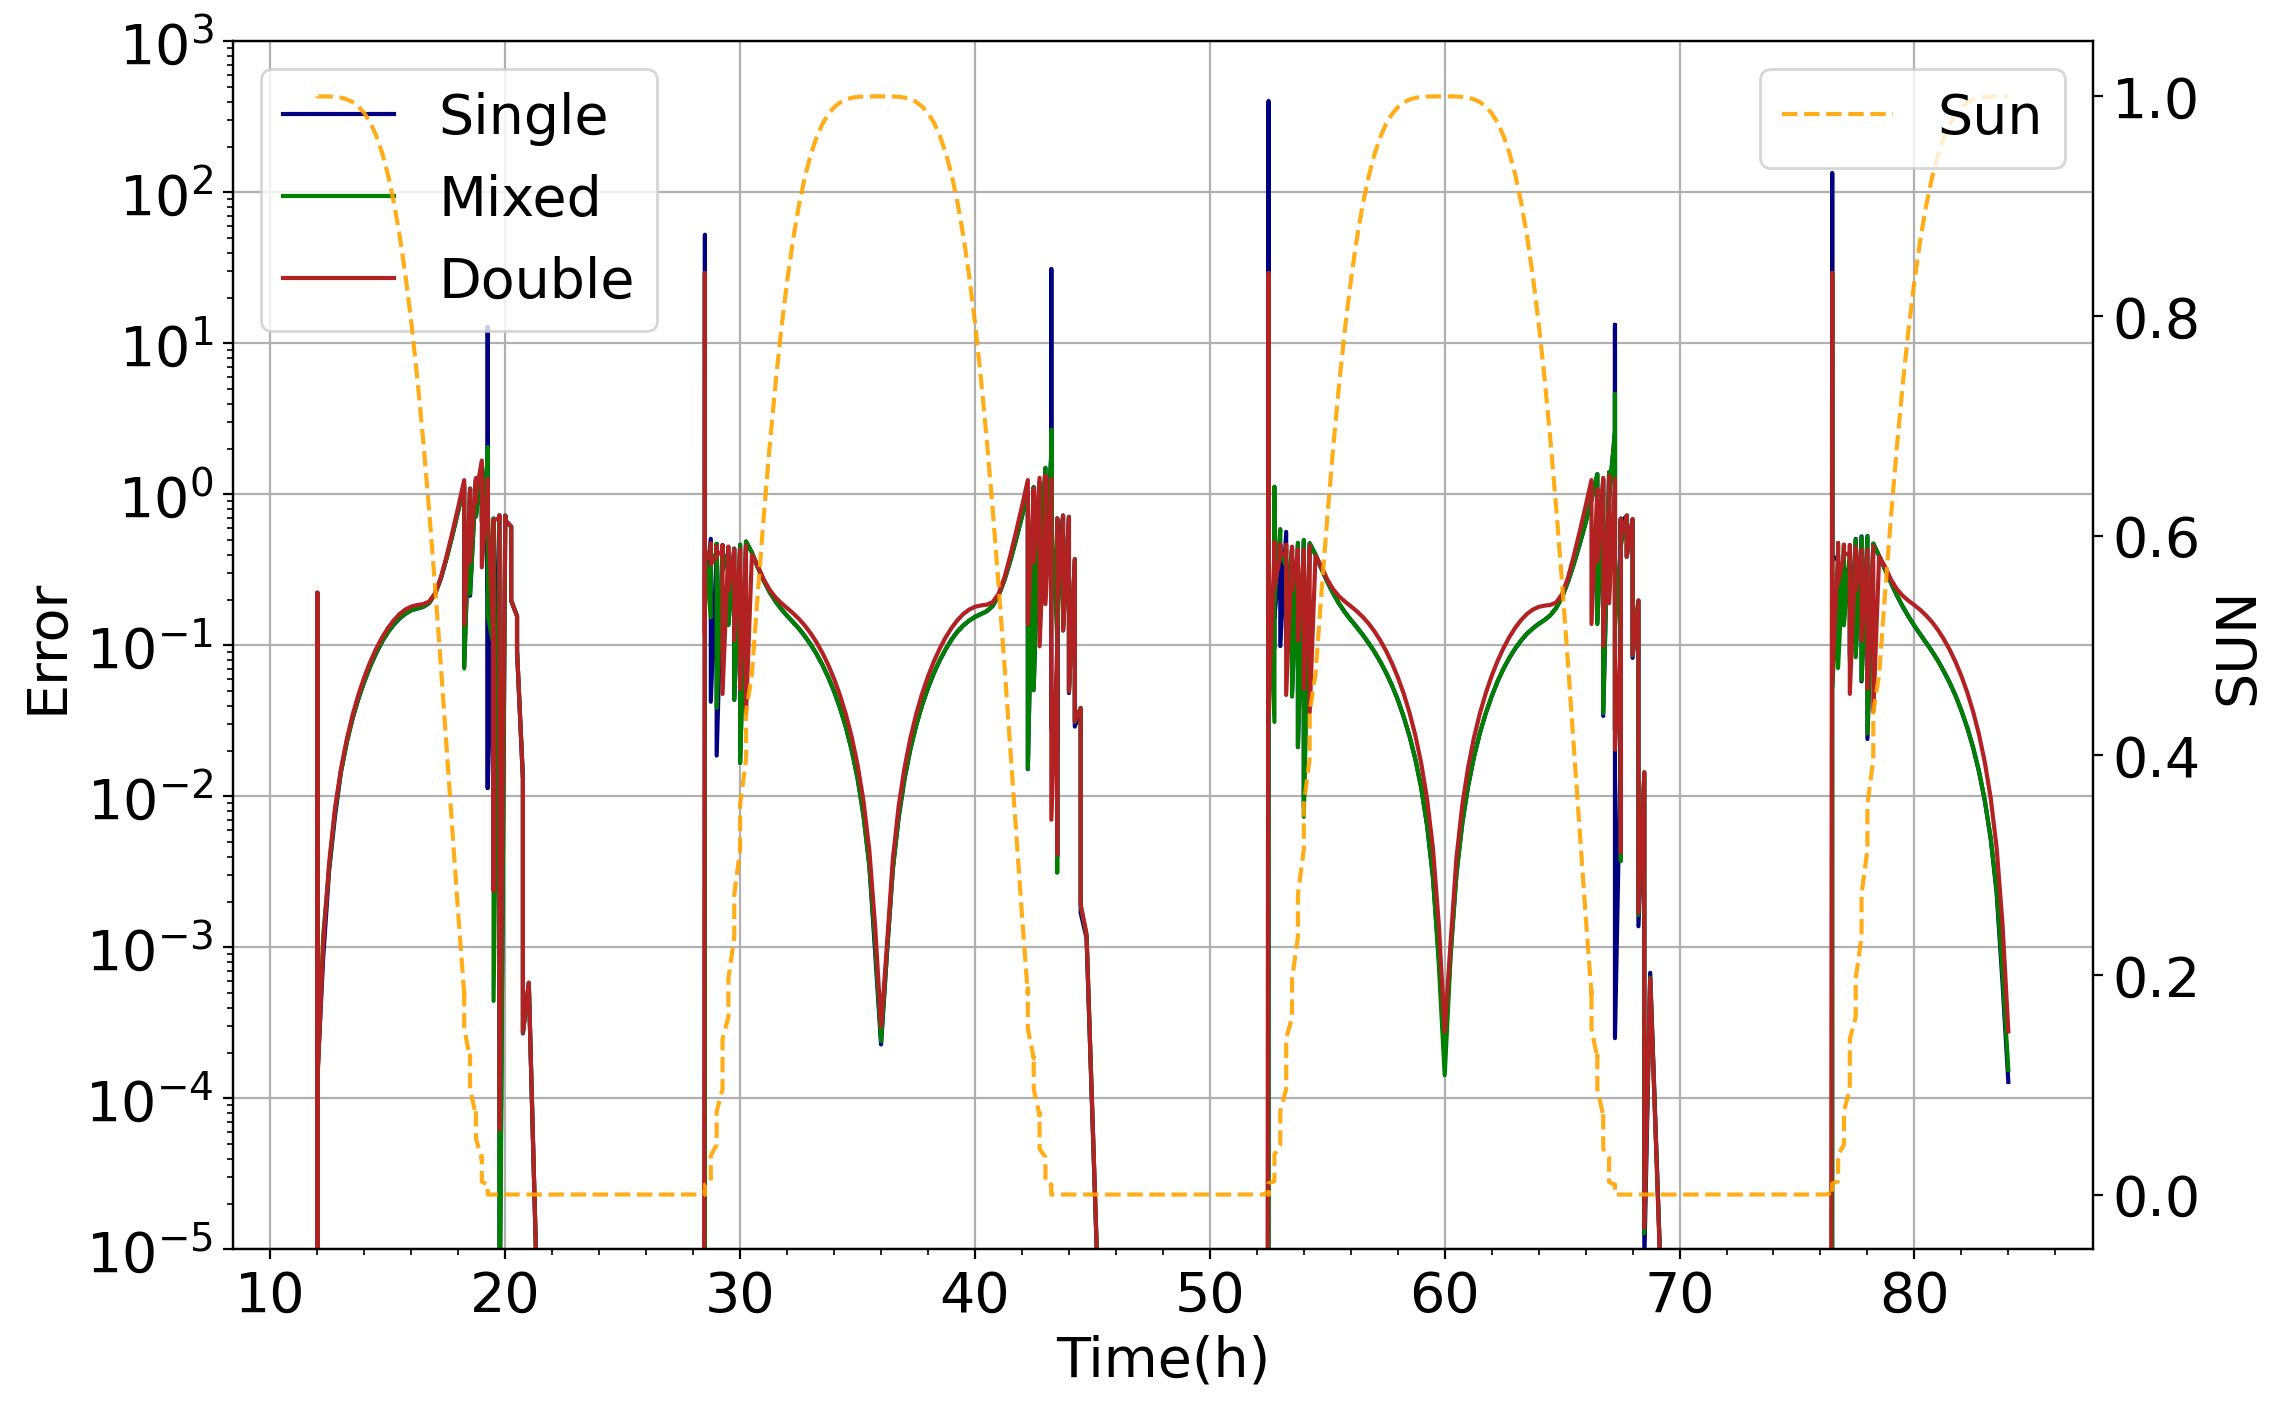

In [20]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
 
ax2 = ax.twinx()
ax.grid(True, which="major")
ax.semilogy(t2_error_single,total_error_single, label = "Single", color = 'navy')
ax.semilogy(t2_error_mixed,total_error_mixed, label = "Mixed", color = 'green')
ax.semilogy(t2_error_double,total_error_double, label = "Double", color = 'firebrick')



ax.set_ylim([1e-5,1000])

ax2.plot(t2_error_double, sun, label = "Sun", color = 'orange', linestyle = '--', alpha=0.9)
ax2.set_ylim([-0.05,1.05])

ax.set_xlabel('Time(h)', fontsize=20)
ax.set_ylabel('Error', fontsize=20)
ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax.minorticks_on()

ax2.set_ylabel('SUN', fontsize=20)
ax.legend(loc ="upper left", fontsize=20)
ax2.legend(loc = "upper right", fontsize=20)
plt.show()